In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

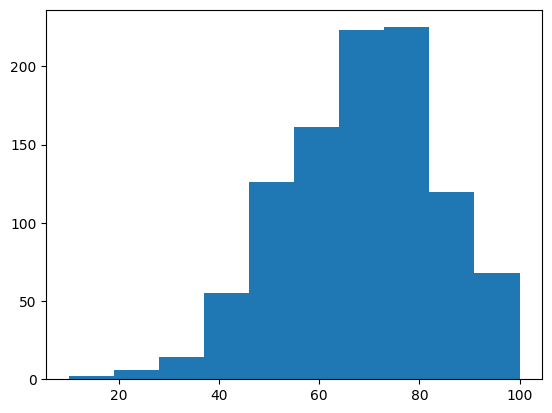

In [8]:
plt.hist(x = df.writing_score)

In [9]:
df.shape

(1000, 8)

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("categories in gender variable:---", end = " ")
print(df['gender'].unique())
print("\ncategories in race ethnicity variable:---", end = " ")
print(df['race_ethnicity'].unique())
print("\ncategories in parental level of education variable:---", end = " ")
print(df['parental_level_of_education'].unique())
print("\ncategories in lunch variable:---", end = " ")
print(df['lunch'].unique())
print("\ncategories in test preparation course variable:---", end = " ")
print(df['test_preparation_course'].unique())

categories in gender variable:--- ['female' 'male']

categories in race ethnicity variable:--- ['group B' 'group C' 'group A' 'group D' 'group E']

categories in parental level of education variable:--- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

categories in lunch variable:--- ['standard' 'free/reduced']

categories in test preparation course variable:--- ['none' 'completed']


In [13]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features: {}'.format(len
(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for total score and average

In [14]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['avg_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full_marks = df[df['reading_score'] == 100]['avg_score'].count()
writing_full_marks = df[df['writing_score'] == 100]['avg_score'].count()
math_full_marks = df[df['math_score'] == 100]['avg_score'].count()

print(f'Number of students with full marks in maths: {math_full_marks}')
print(f'Number of students with full marks in writing: {writing_full_marks}')
print(f'Number of students with full marks in reading: {reading_full_marks}')


Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [16]:
reading_less_marks = df[df['reading_score'] <=20]['avg_score'].count()
writing_less_marks = df[df['writing_score'] <=20]['avg_score'].count()
math_less_marks = df[df['math_score'] <=20]['avg_score'].count()

print(f'Number of students with less marks in maths: {math_less_marks}')
print(f'Number of students with less marks in writing: {writing_less_marks}')
print(f'Number of students with less marks in reading: {reading_less_marks}')


Number of students with less marks in maths: 4
Number of students with less marks in writing: 3
Number of students with less marks in reading: 1


### Exploring data (visualization)

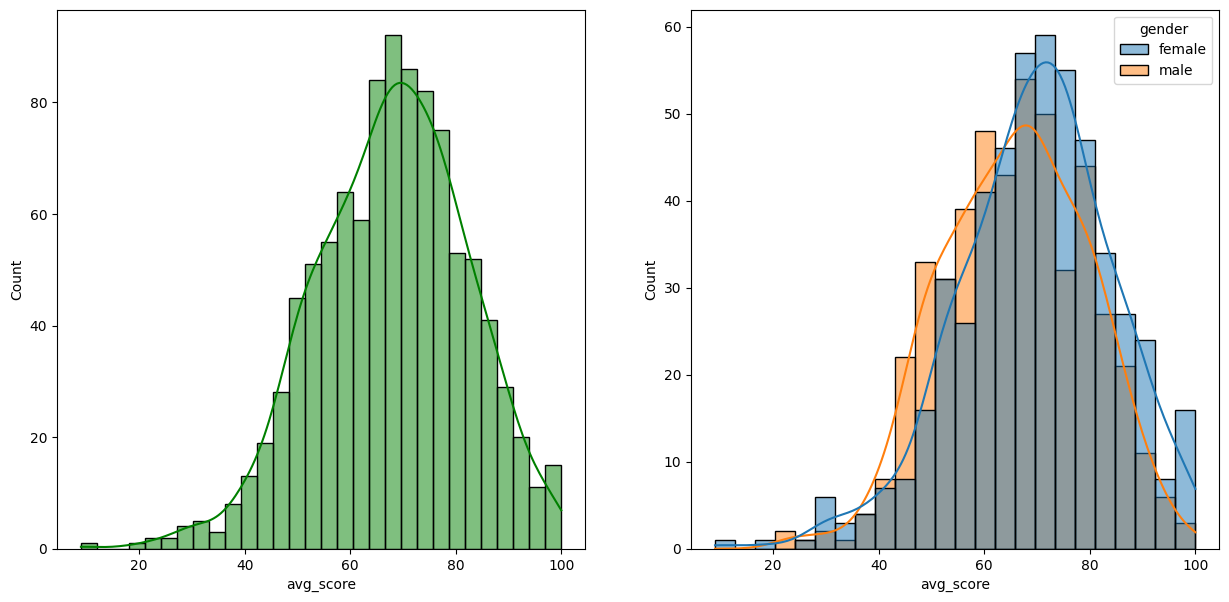

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')
plt.show()

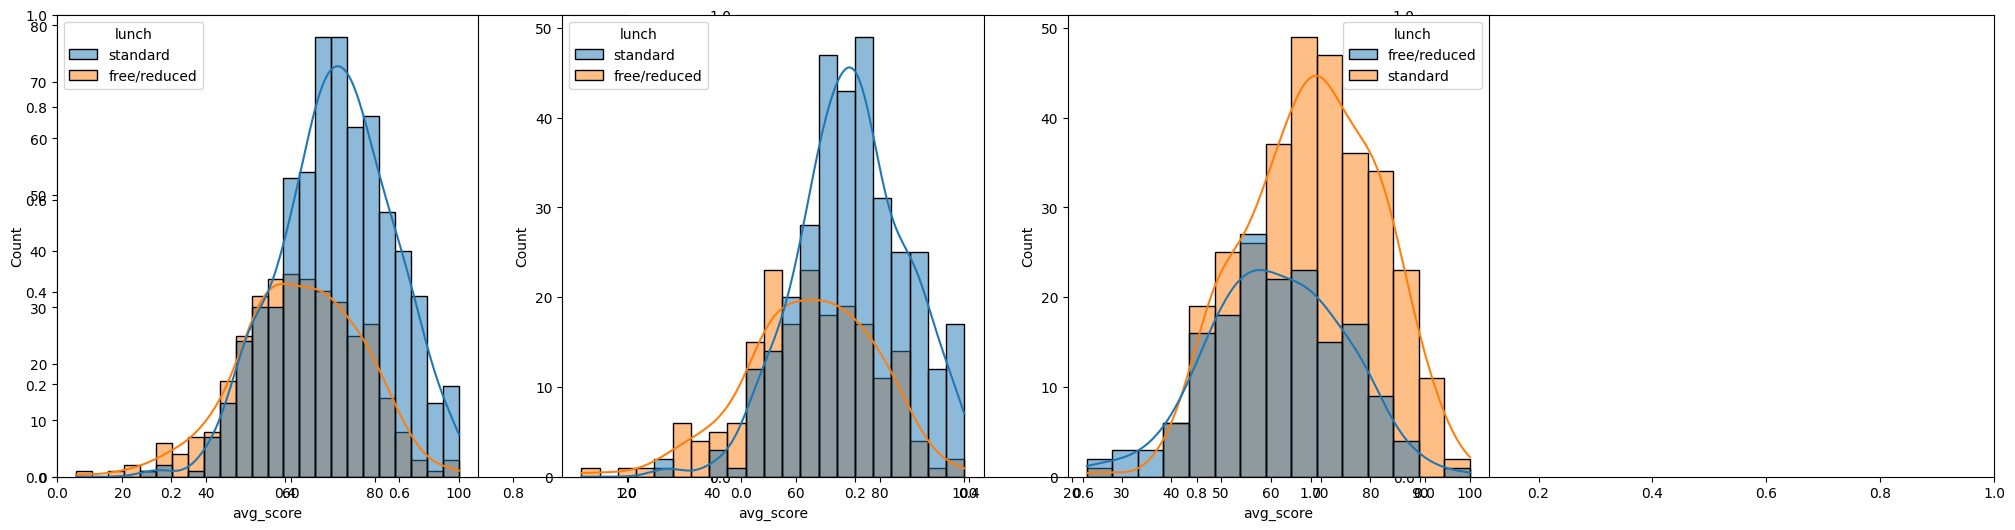

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='avg_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch')
plt.show()

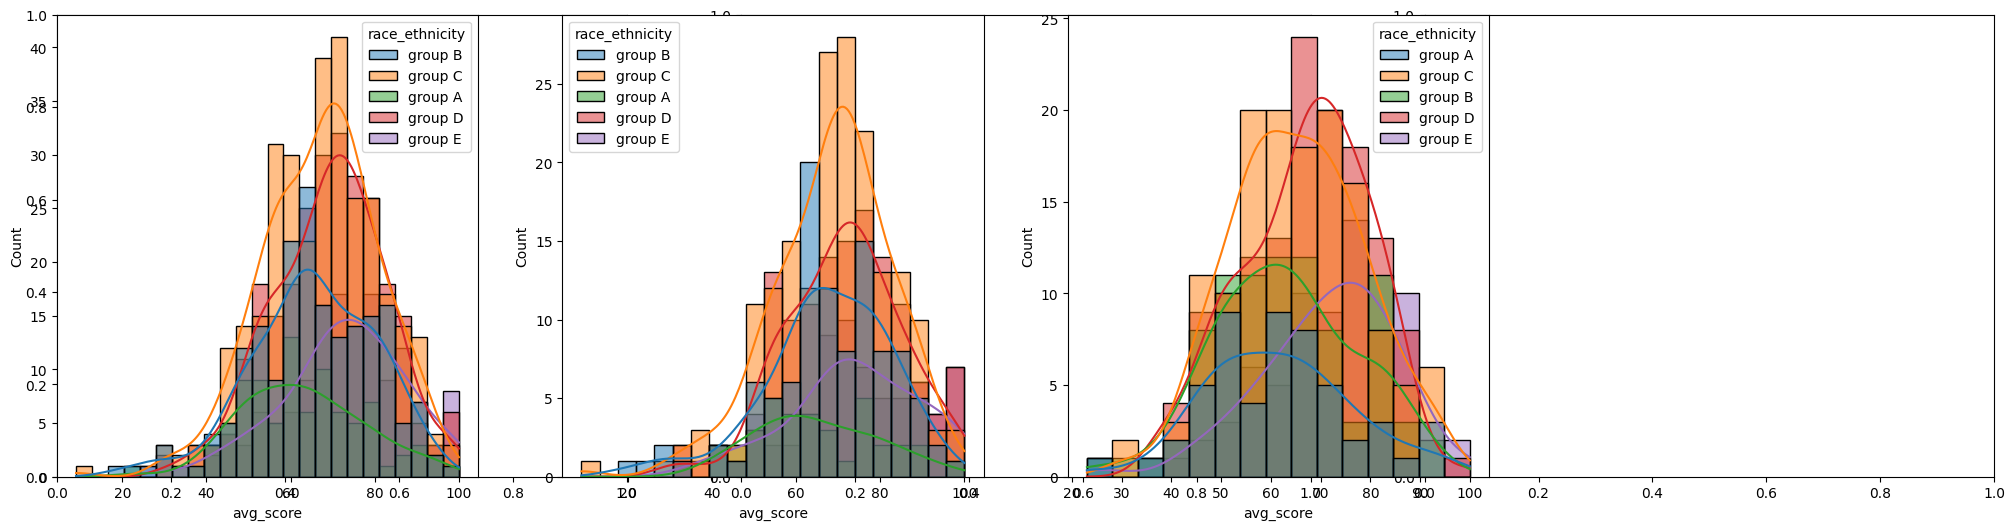

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity')
plt.show()

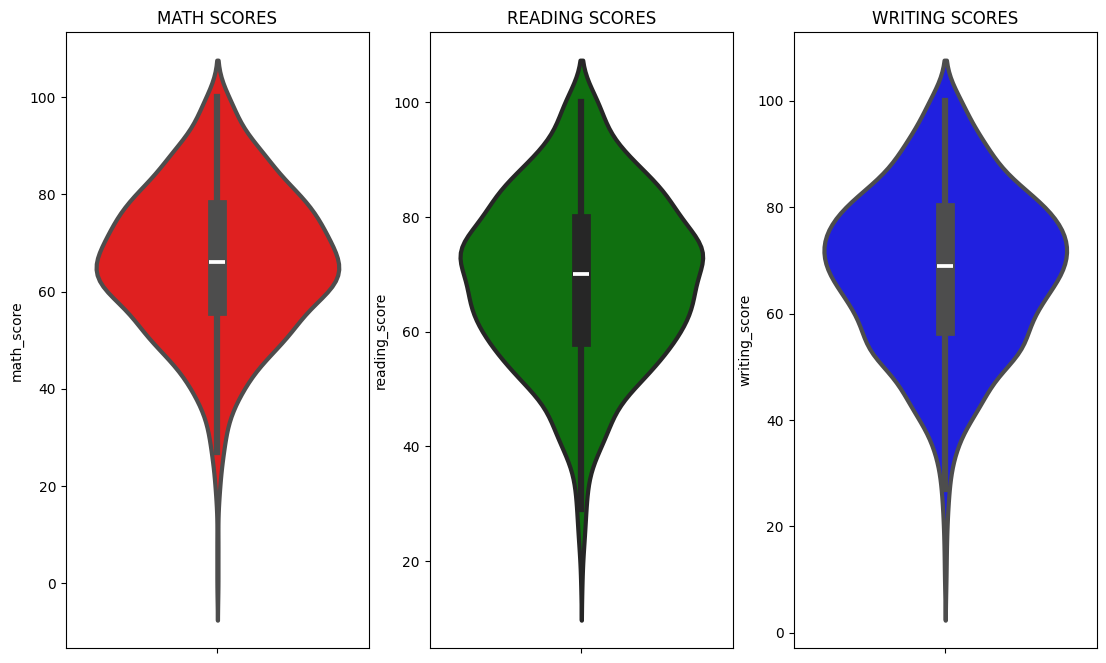

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(data=df,y='math_score',color='r',
linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


#### Multivatirate analyis using pieplot

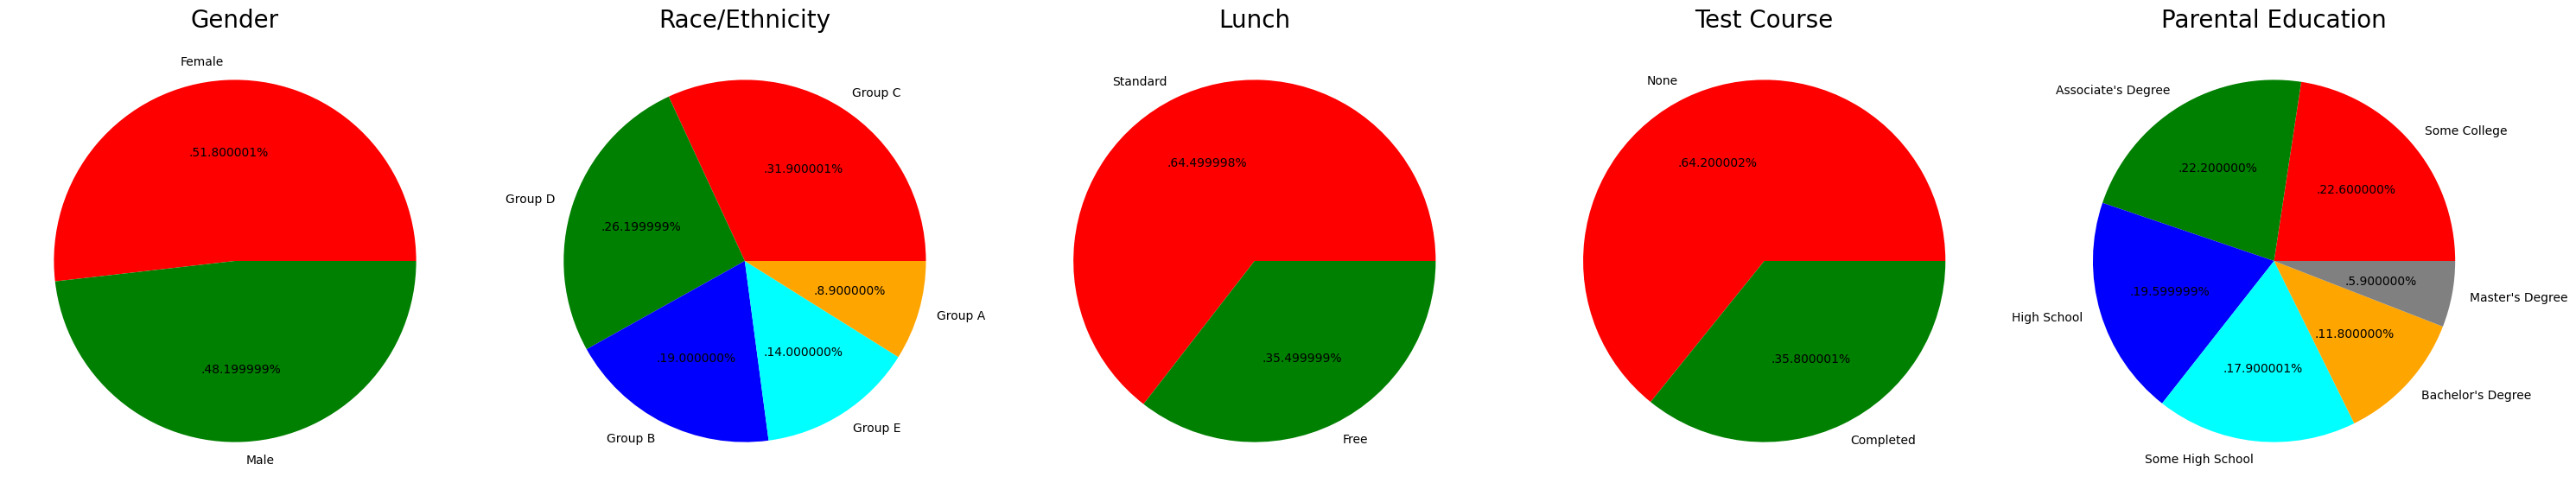

In [32]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['r','g']

plt.pie(size,colors = color,labels = labels, autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [27]:
df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

#### Featrue wise visualization 

([<matplotlib.patches.Wedge at 0x278d8660d30>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Female'),
  Text(0.06782226650507357, -1.1980818587083752, 'Male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

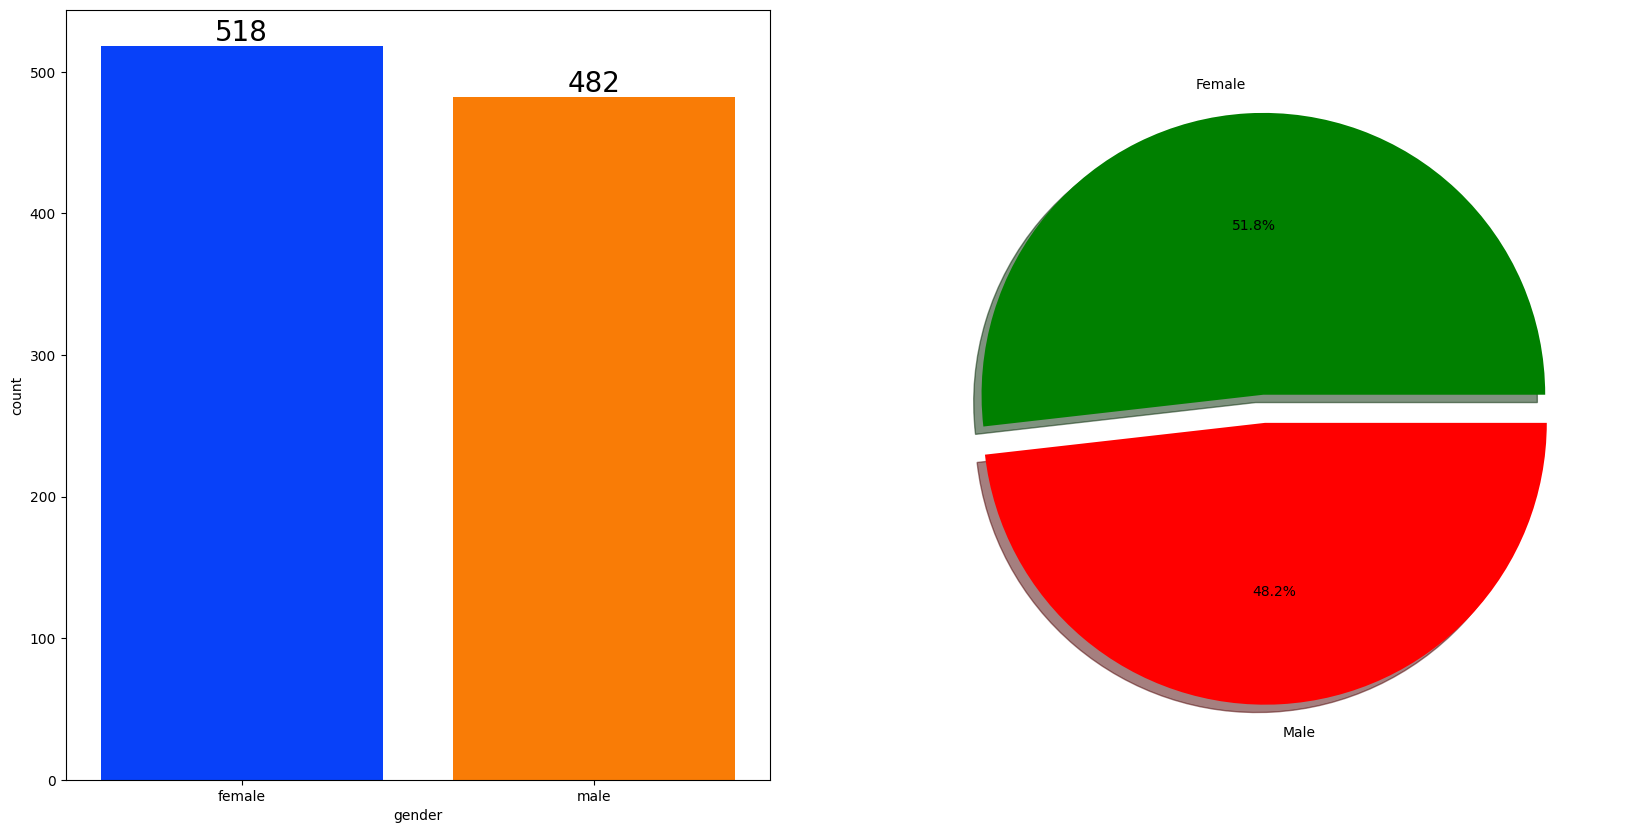

In [40]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df.gender,data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df.gender.value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['green','red'])


#### Bivariate analysis

In [42]:
df.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
260,female,group C,some high school,free/reduced,completed,64,79,77,220,73.333333


([<matplotlib.patches.Wedge at 0x278e274ab30>,
 [Text(0.6461719988148862, 1.0111685062083247, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3769336659753503, 0.5898482952881894, '31.9'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.2'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.0'),
  Text(0.32467274541824787, -0.5045667531482604, '14.0'),
  Text(0.5766992522671516, -0.1655837323969605, '8.9')])

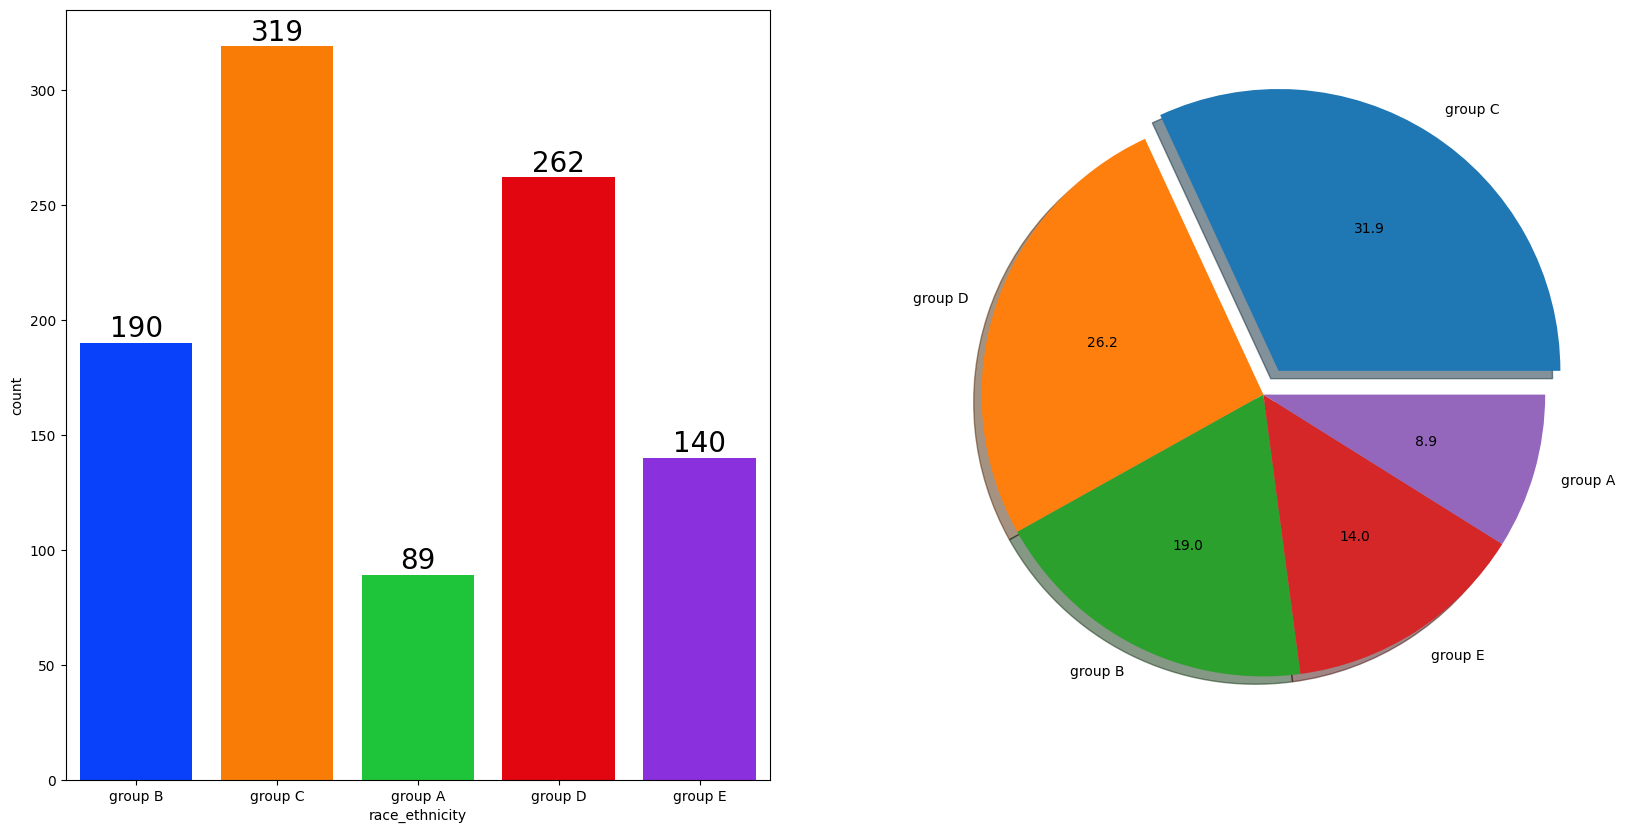

In [62]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df.race_ethnicity,data = df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df.race_ethnicity.value_counts(),labels=df.race_ethnicity.value_counts().index,autopct='%1.1f',shadow=True,explode=[0.1,0,0,0,0])

<Axes: xlabel='race_ethnicity'>

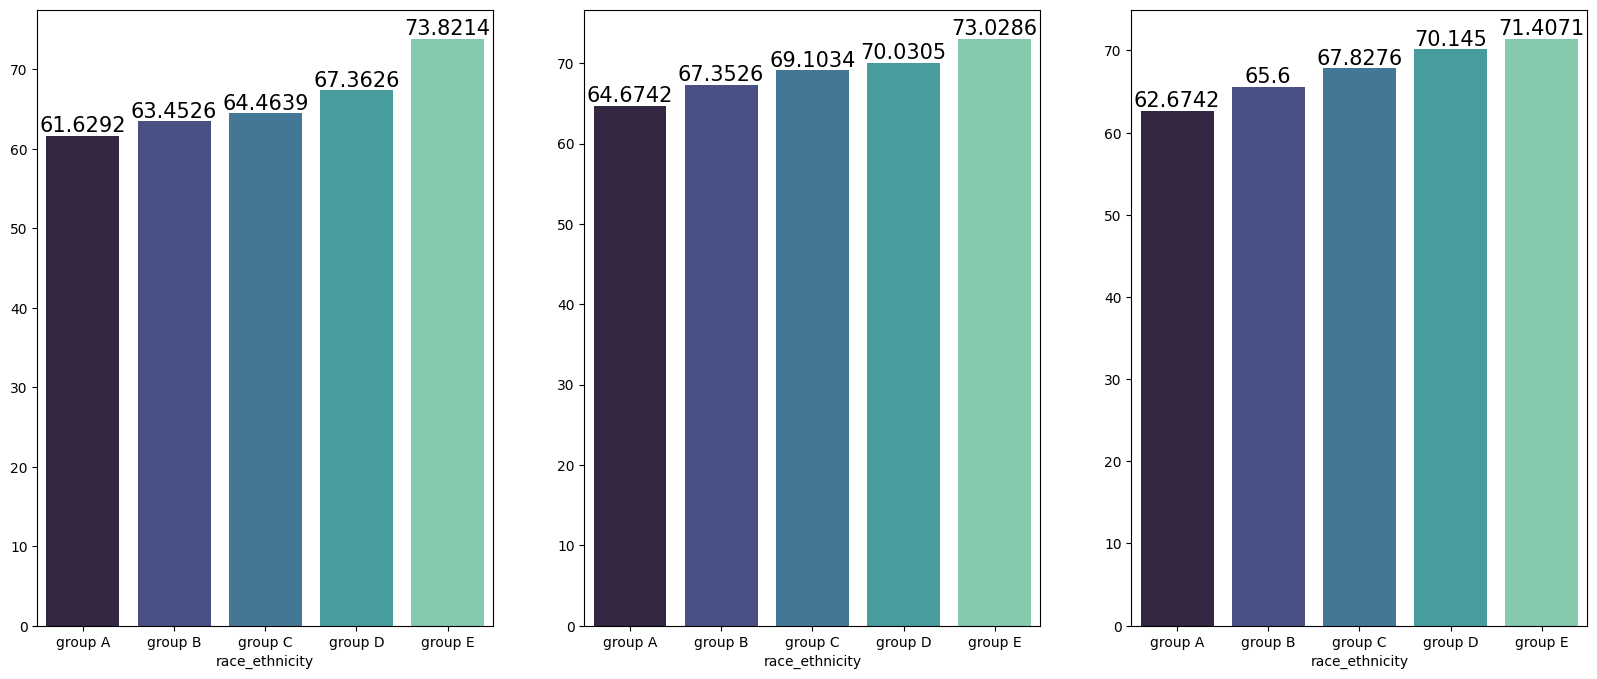

In [70]:
group_data2 = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette='mako',ax=ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot()
sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette='mako',ax=ax[1])

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot()
sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette='mako',ax=ax[2])

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

sns.barplot()

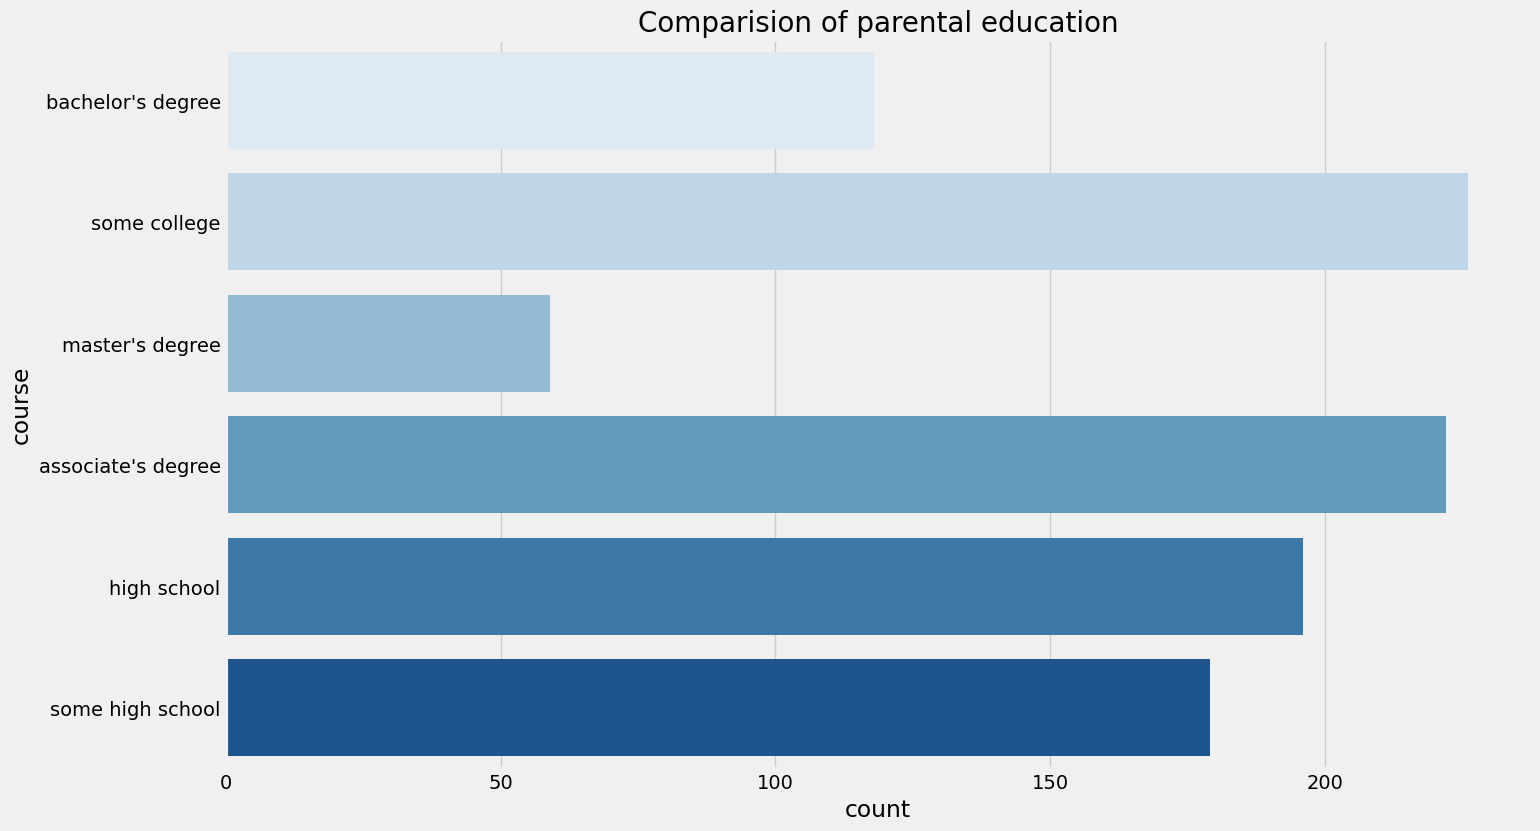

In [79]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df.parental_level_of_education,palette='Blues')
plt.title("Comparision of parental education",fontweight = 30, fontsize=20)
plt.xlabel('count')
plt.ylabel('course')
plt.show()

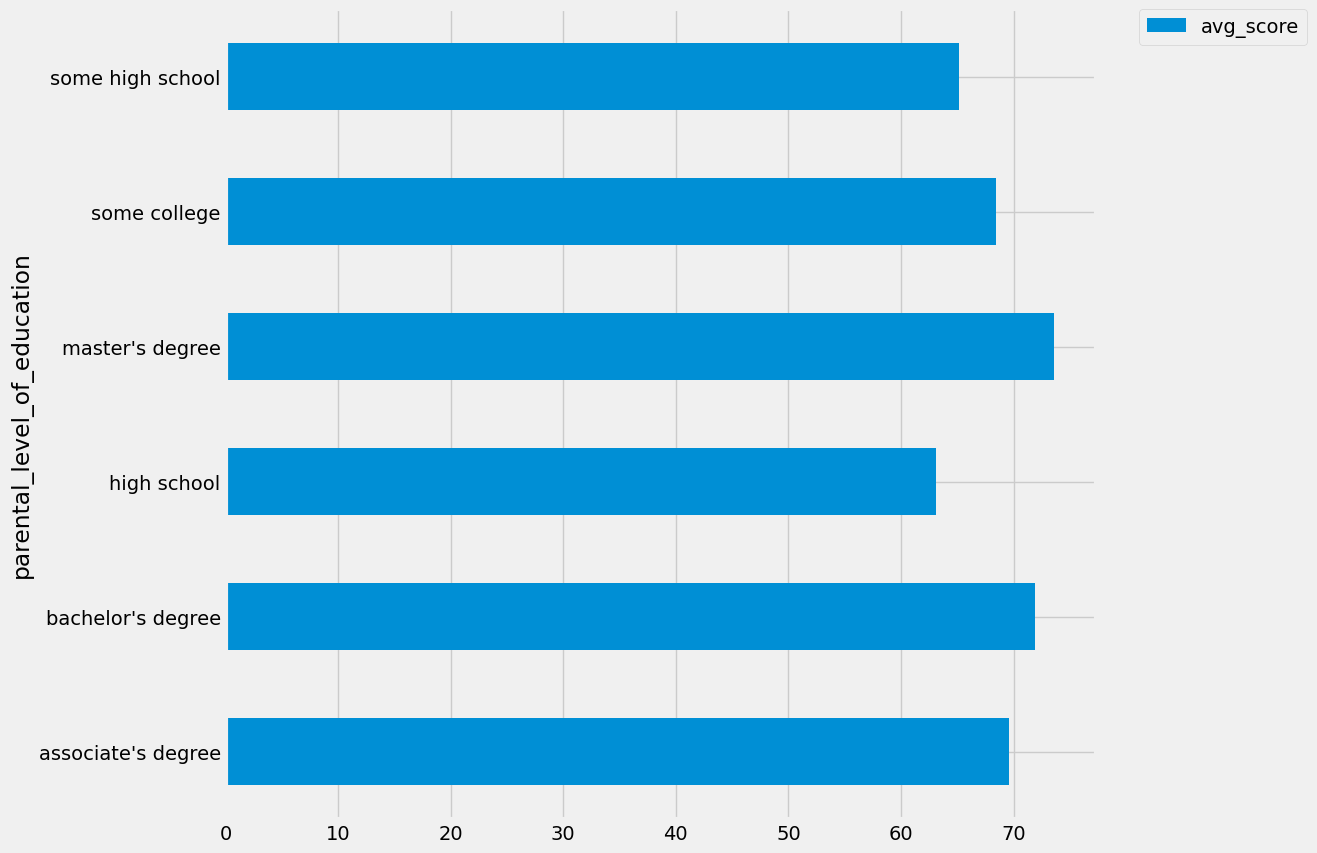

In [82]:
df.groupby('parental_level_of_education')['avg_score'].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

Text(0.5, 1.0, 'comparision_of_different_types_of_lunch')

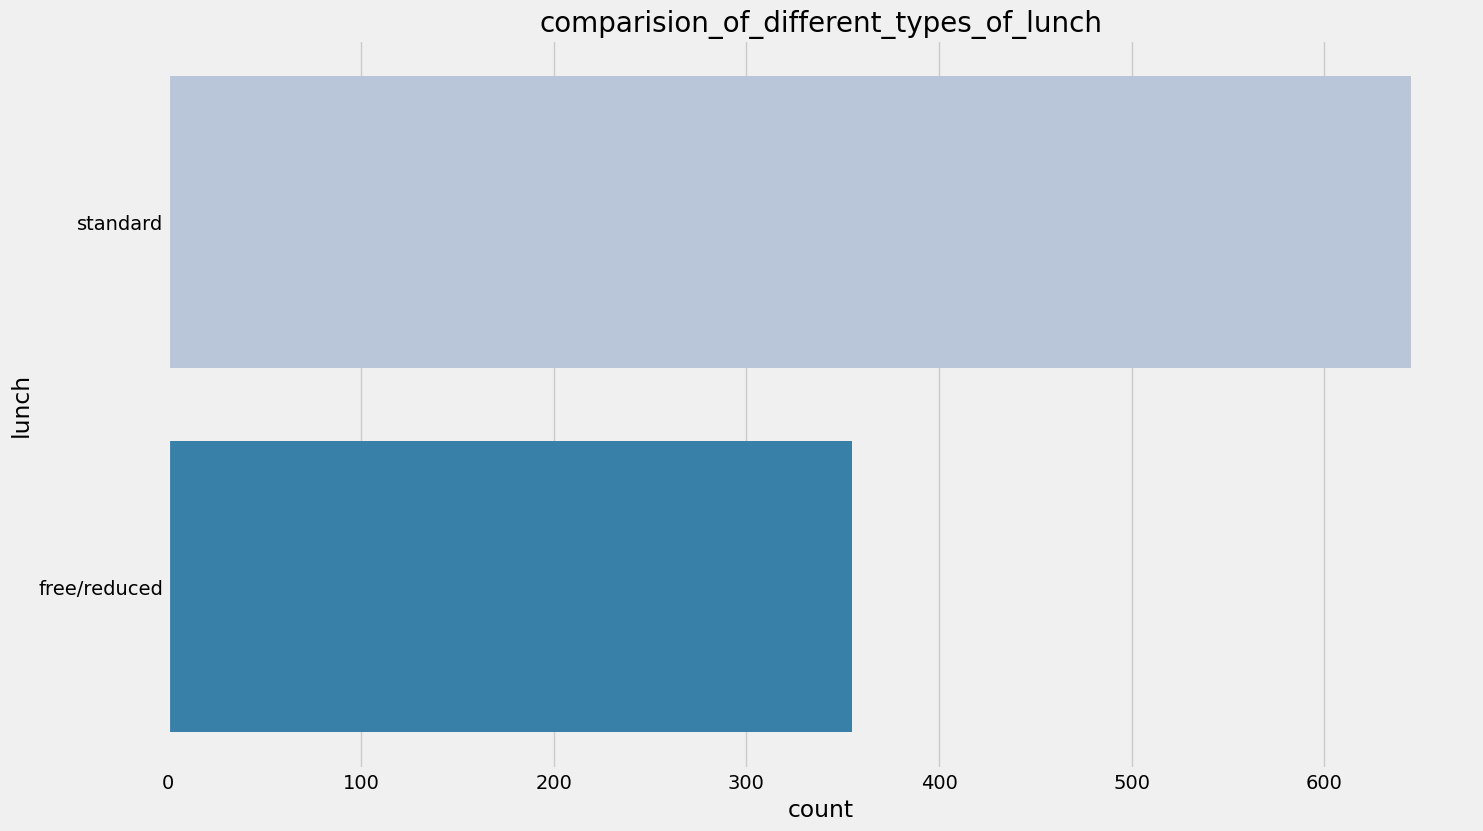

In [86]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df.lunch,palette='PuBu')
plt.title('comparision_of_different_types_of_lunch',fontweight=30,fontsize=20)

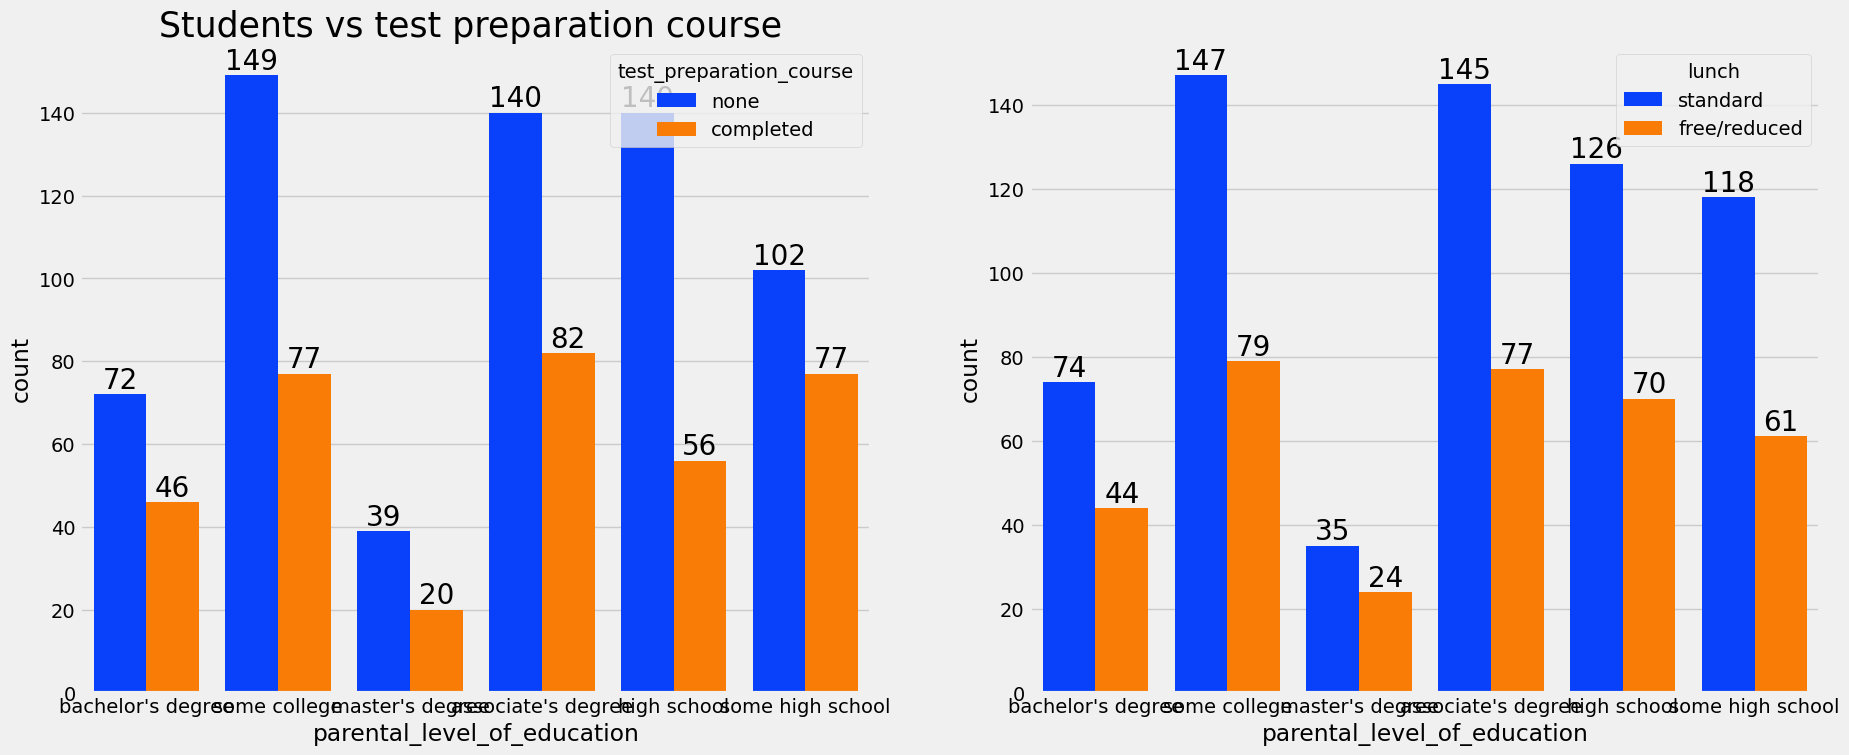

In [96]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x = df['parental_level_of_education'],data =df,palette='bright',hue = 'test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data = df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)


<Axes: xlabel='lunch', ylabel='writing_score'>

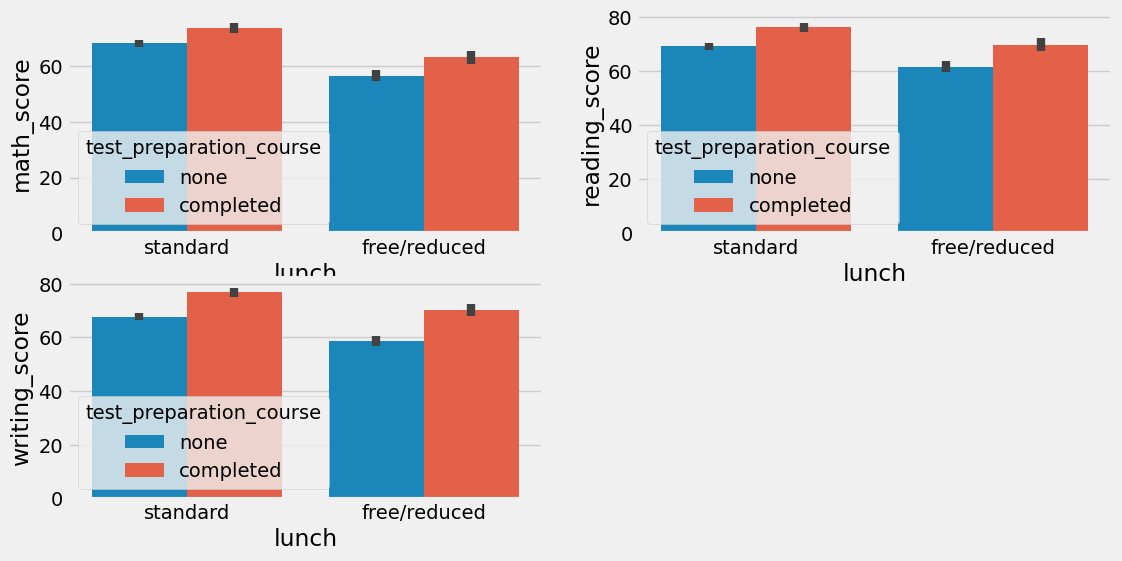

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])


<Axes: ylabel='avg_score'>

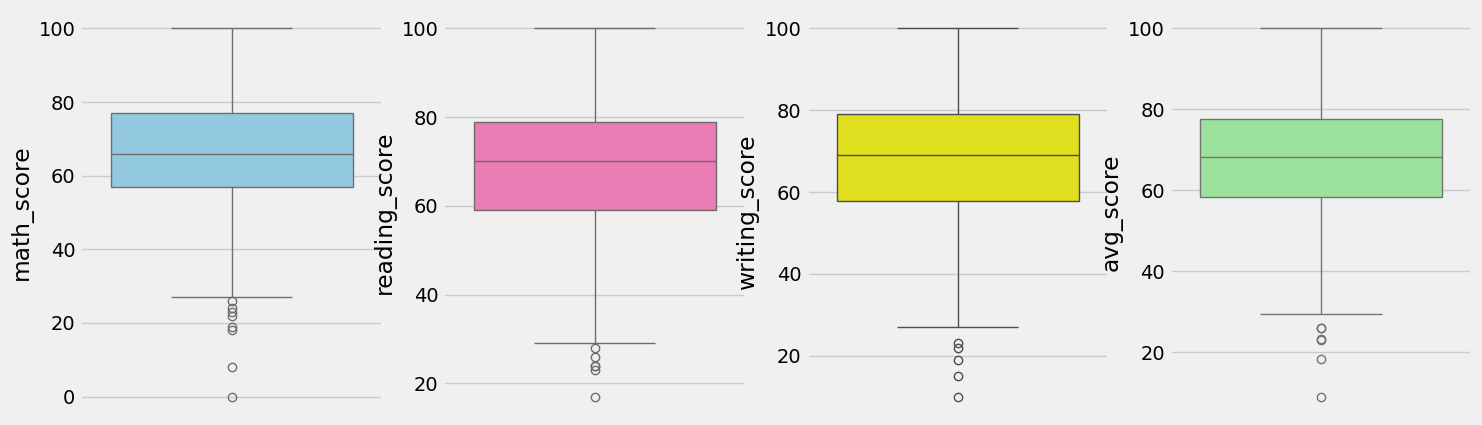

In [101]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df.math_score,color='skyblue')
plt.subplot(142)
sns.boxplot(df.reading_score,color='hotpink')
plt.subplot(143)
sns.boxplot(df.writing_score,color='yellow')
plt.subplot(144)
sns.boxplot(df.avg_score,color='lightgreen')

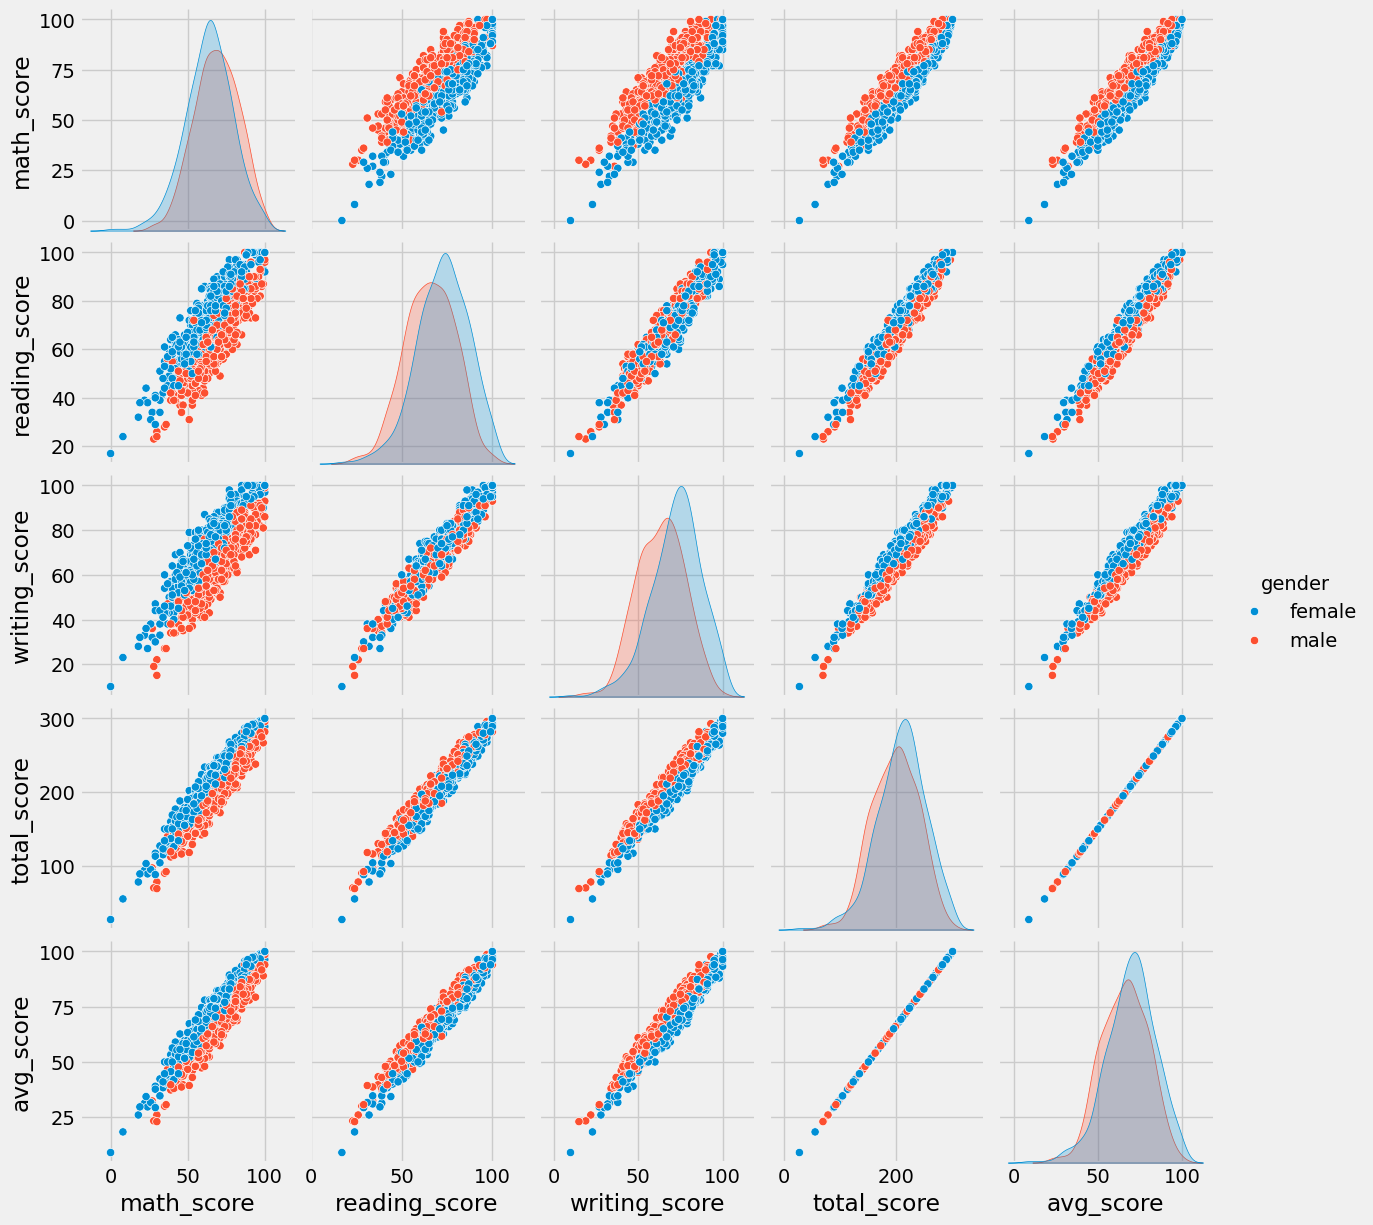

In [102]:
sns.pairplot(df,hue='gender')
plt.show()